## annoy: Fast Array Retrieval


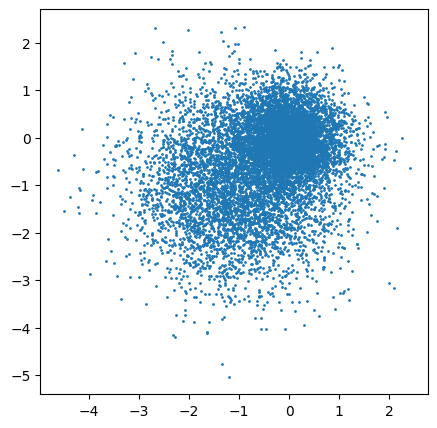

In [1]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate(
    [
        np.random.normal(-1, 1, (5000, columns)),
        np.random.normal(0, 0.5, (5000, columns)),
    ]
)

annoy = AnnoyIndex(columns, "euclidean")
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
# this is the line that we changed from 1 -> 10
annoy.build(n_trees=10)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1)

indices = annoy.get_nns_by_vector(np.array([-1.0, -1.0]), 2000)

## bad labels: And how to find them


## cvxpy: Linear Programming & Quadratic Portfolio


## deon: Sensible Checklists


## embeddings: The intuition behind them


[embeddings to use in scikit learn](https://github.com/koaning/embetter)


In [2]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from embetter.grab import ColumnGrabber
from embetter.text import SentenceEncoder

In [ ]:
# !pip install embetter[sbert]

In [3]:
# This pipeline grabs the `text` column from a dataframe
# which then get fed into Sentence-Transformers' all-MiniLM-L6-v2.
text_emb_pipeline = make_pipeline(
    ColumnGrabber("text"), SentenceEncoder("all-MiniLM-L6-v2")
)

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

In [5]:
# This pipeline can also be trained to make predictions, using
# the embedded features.
text_clf_pipeline = make_pipeline(text_emb_pipeline, LogisticRegression())

In [6]:
dataf = pd.DataFrame(
    {"text": ["positive sentiment", "super negative"], "label_col": ["pos", "neg"]}
)
X = text_emb_pipeline.fit_transform(dataf, dataf["label_col"])
text_clf_pipeline.fit(dataf, dataf["label_col"]).predict(dataf)

/Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Productivity/dev_proj_Productivity/practise_prod_python_tools/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


array(['pos', 'neg'], dtype=object)

## human learn: Rule Based Systems


In [5]:
from jax import grad

In [7]:
def f(x):
    return x**2


grad_f = grad(f)

In [9]:
f(3.0)

9.0

In [10]:
grad_f(3.0)

Array(6., dtype=float32, weak_type=True)

## jax: Autodiff


## memo: Collect Stats


## model•mining: From Data to Model


## numba: Fast Numeric Code


## partial_fit: Batches of ML


## ray: Parallel Execution


In [9]:
import numpy as np


def birthday_experiment(class_size: int, n_sim: int = 1000):
    """simulates the birthday paradox"""
    sims = np.random.randint(1, 365 + 1, (n_sim, class_size))
    sort_sims = np.sort(sims, axis=1)
    n_uniq = (sort_sims[:, 1:] != sort_sims[:, :-1]).sum(axis=1) + 1
    return {"est_prob": np.mean(n_uniq != class_size)}

In [10]:
%%time
results = [birthday_experiment(class_size=size, n_sim=1000) for size in range(2, 100)]

CPU times: user 108 ms, sys: 3.74 ms, total: 112 ms
Wall time: 111 ms


In [11]:
%%time
results = [birthday_experiment(class_size=size, n_sim=10_000) for size in range(2, 100)]

CPU times: user 945 ms, sys: 72.4 ms, total: 1.02 s
Wall time: 1.02 s


## scikit dummy: Smart Benchmark


## scikit learn: Overview Starts Here


In [5]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pylab as plt

In [3]:
X,y = load_wine(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor())
])

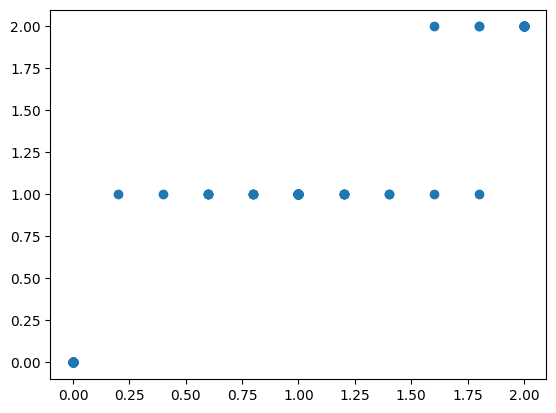

In [6]:
pred = pipe.fit(X,y).predict(X)
plt.scatter(pred, y)

## scikit meta: Extra Model Behavior


## scikit metrics: Measurement Matters


In [3]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:01<00:00, 64.9MB/s]

Extracting files...


Path to dataset files: /Users/vamsi_mbmax/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/vamsi_mbmax/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv")[:80_000]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(80000, 31)

In [8]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

f"Shapes of X={X.shape} y={y.shape}, # Fraud cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), # Fraud cases=196'

In [ ]:
# start here

## scikit prep: Preprocess Data


## scikit save: Re•Use Models Safely


## sympy: Math with Python
